In [1]:
# Load libraries
import os
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data set

data = pd.read_csv('bank-additional-full.csv', delimiter=';')

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Check missing values

data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Checking the statistical summary

data.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [7]:
# Label Encoding for Target Variable

c_y = {"y": {'yes': 1, "no": 0}}

data.replace(c_y, inplace=True)

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
# Splitting the Target Variable

predictor = data.iloc[:, data.columns != 'y']
target = data.iloc[:,data.columns == 'y']

In [9]:
# Dummy Coding for categorical variables

# Save all the categorical variables in a list
# Retrive just the names

cat_cols = [col for col in predictor.columns.values if predictor[col].dtype == 'object']

# dataframe with categorical variables

data_cat = predictor[cat_cols]

# dataframe with numerical variables

data_num = predictor.drop(cat_cols, axis=1)

In [10]:
# use pd dummyvariable for cat vars

data_cat_dummies = pd.get_dummies(data_cat,drop_first=True)

In [11]:
# Concatenate the data set (num var and dummied cat vars)

predictor = pd.concat([data_num, data_cat_dummies],axis=1)

In [12]:
predictor.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [13]:
predictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

In [14]:
# Split the data set into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(predictor, target, test_size=.30, random_state=0)

print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (28831, 53)
x_test (12357, 53)
y_train (28831, 1)
y_test (12357, 1)


In [15]:
# Create DT classifier object using Gini Index
# WE are just creating an instance / object
# WE will use this instance / object while fitting / training the model

clf_dt = DecisionTreeClassifier(criterion='gini',random_state=0)

In [16]:
# Train the model

model_dt = clf_dt.fit(x_train, y_train)

In [17]:
# PRedicting the model

y_pred_dt = model_dt.predict(x_test)

y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Un-comment the below line to see the tree

In [18]:
#plt.figure(figsize=(22,11))

#plot_tree(model_dt, fontsize=11, feature_names=x_train.columns, filled=True, class_names=["0","1"])

#plt.show()

In [19]:
# Checking the performance of the model

from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test, y_pred_dt)) # Why is presicion, recall, F-1 Score so low for cat 0 and high for col 1

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10969
           1       0.52      0.54      0.53      1388

    accuracy                           0.89     12357
   macro avg       0.73      0.74      0.73     12357
weighted avg       0.89      0.89      0.89     12357



In [21]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [22]:
# There is a serious class imbalance.
# Check the above frequency of target variable

# Create Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=0, n_estimators=500, criterion='entropy', bootstrap=False) 
# Bootstrap- Sampling with Replacement

In [23]:
# Train the model

model_rf = clf_rf.fit(x_train,y_train)

# Predict the model

y_pred_rf = model_rf.predict(x_test)

y_pred_rf

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [24]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10969
           1       0.66      0.49      0.56      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.73      0.76     12357
weighted avg       0.91      0.91      0.91     12357



In [25]:
# We are not able to control the class immbalance even after RF

In [26]:
# Create DT clf object using gini index

clf_dt_arg = DecisionTreeClassifier(criterion='gini', random_state=0, min_samples_leaf=700, max_features=10,max_depth=5)

# min_sample_leaf - decides how many minimum observations hould be present in a split
# max_features - we will take max upto 10 variables
# max_depth - number of branches / Levels (Here splits will happen in 5 levels)

In [27]:
# Train the model / fit the model

model_dt_arg = clf_dt_arg.fit(x_train,y_train)

# Predict the model

y_pred_dt_arg = model_dt_arg.predict(x_test)

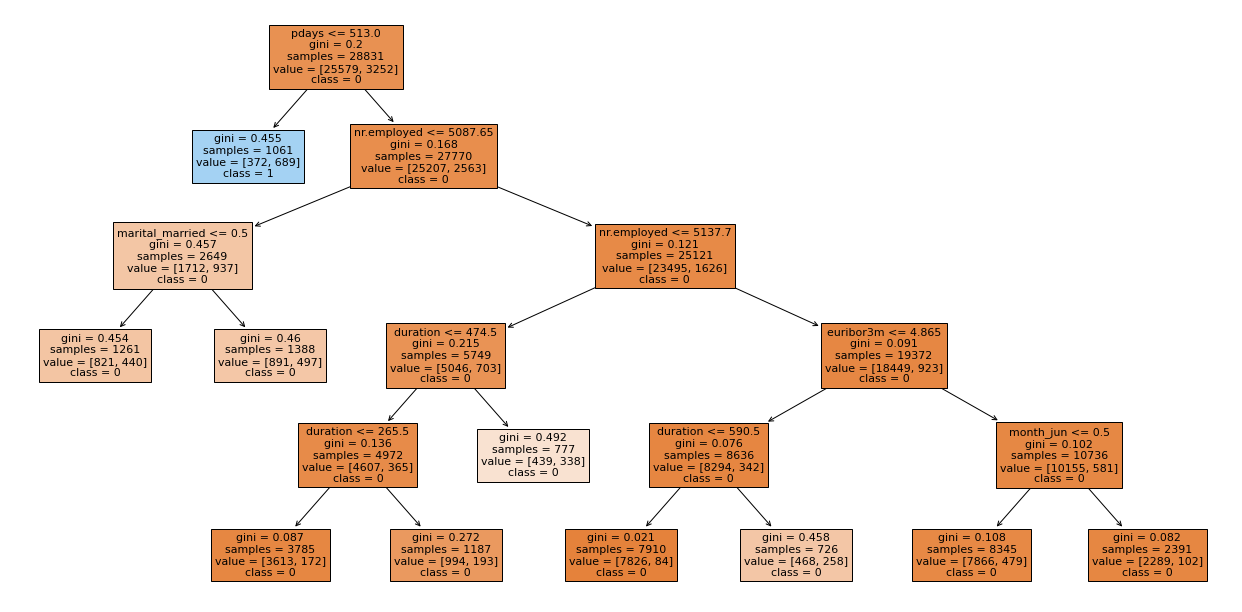

In [28]:
plt.figure(figsize=(22,11))

plot_tree(model_dt_arg, fontsize=11, feature_names=x_train.columns, filled=True, class_names=['0','1'])

plt.show()

In [29]:
print(classification_report(y_test, y_pred_dt_arg))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10969
           1       0.61      0.20      0.30      1388

    accuracy                           0.90     12357
   macro avg       0.76      0.59      0.62     12357
weighted avg       0.87      0.90      0.87     12357



# SMOTE for class imbalance

In [30]:
# !pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

predictor_sm, target_sm = smote.fit_resample(predictor, target)

target_sm.value_counts()

y
0    36548
1    36548
dtype: int64

In [32]:
# Now there is no class imbalane

In [33]:
# Now split the data set into train and test

x_train,x_test,y_train,y_test = train_test_split(predictor_sm, target_sm, test_size=0.30,random_state=0)

print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (51167, 53)
x_test (21929, 53)
y_train (51167, 1)
y_test (21929, 1)


# DT Classifier

In [34]:
# Creating the instance / object for training the model

clf_dt_smote = DecisionTreeClassifier(criterion='entropy', random_state=0, min_samples_leaf=700, max_depth=6)

In [36]:
# Train the model

model_dt_smote = clf_dt_smote.fit(x_train, y_train)

# PRediction using the new model

y_pred_dt_smote = model_dt_smote.predict(x_test)

y_pred_dt_smote

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

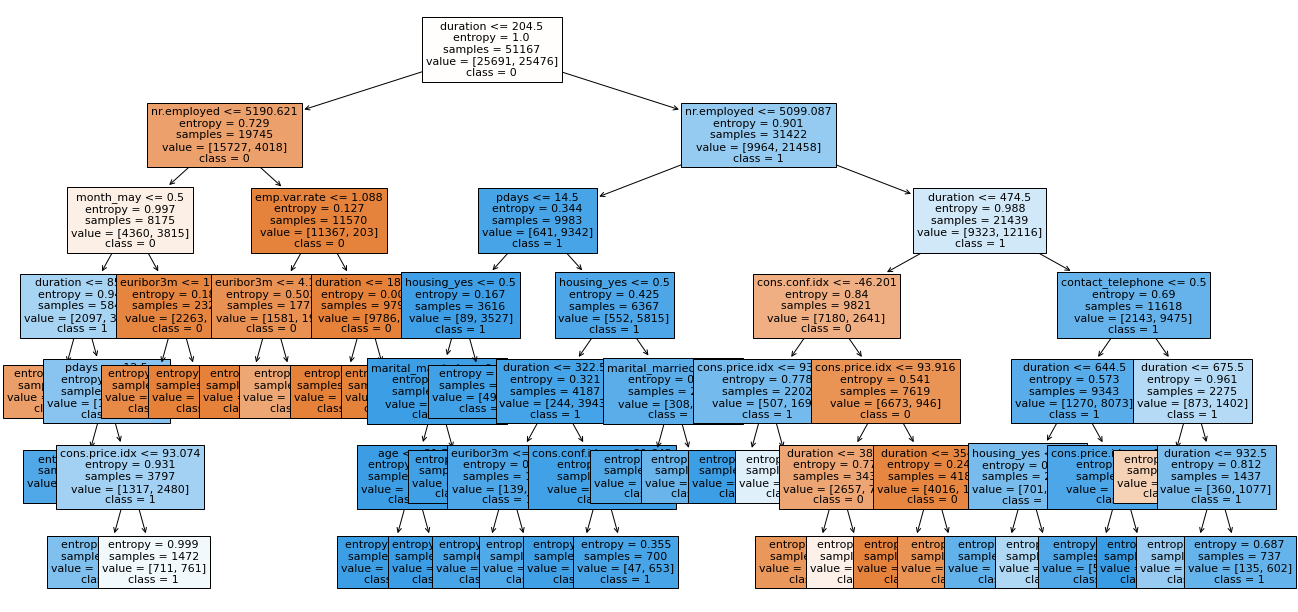

In [37]:
plt.figure(figsize=(22,11))

plot_tree(model_dt_smote, fontsize=11, feature_names=x_train.columns, filled=True, class_names=['0','1'])

plt.show()

In [38]:
print(classification_report(y_test, y_pred_dt_smote))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88     10857
           1       0.85      0.93      0.89     11072

    accuracy                           0.88     21929
   macro avg       0.89      0.88      0.88     21929
weighted avg       0.89      0.88      0.88     21929



# Grid Search for DT / Hyper-Parameter Tuning

In [39]:
# This is to find the good CP value

from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion':['gini','entropy'],'max_depth': range(2,10)}]

clf_tree = DecisionTreeClassifier()

clf = GridSearchCV(clf_tree, tuned_parameters, cv=10, scoring='roc_auc')

clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [41]:
# Checking which is the best parameter

clf.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [42]:
# Checking which is the score corresponding to the best parameter

clf.best_score_

0.9681703340754284

# Final Model after Grid Search

In [43]:
# Creating the DT classifier object using 'entropy'

final_dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0, min_samples_leaf=700, max_depth=9)

final_dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=700,
                       random_state=0)

In [48]:
y_pred_final_dt_model = final_dt_model.predict(x_test)

y_pred_final_dt_model

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [49]:
print(classification_report(y_test, y_pred_final_dt_model))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88     10857
           1       0.86      0.92      0.89     11072

    accuracy                           0.89     21929
   macro avg       0.89      0.89      0.89     21929
weighted avg       0.89      0.89      0.89     21929



# Random Forest classifier

In [54]:
# Now train the model after smote, as we did with in DT  

In [50]:
clf_rf_smote = RandomForestClassifier(random_state=0, bootstrap=False)

In [52]:
# Train the model

model_rf_smote = clf_rf_smote.fit(x_train,y_train)

# PRedict the model

y_pred_rf_smote = model_rf_smote.predict(x_test)

y_pred_rf_smote

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred_rf_smote)) # Check if the precision, recall, F-1 score is approved.

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10857
           1       0.95      0.95      0.95     11072

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929



## ROC Curve for RF classifier

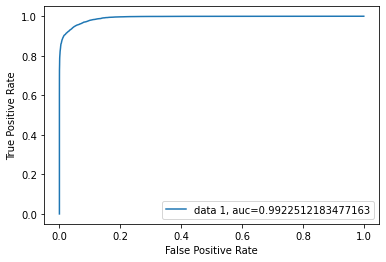

In [55]:
y_pred_proba = model_rf_smote.predict_proba(x_test)[::,1]
fpr, tpr,_  = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

# Featuer importance plot

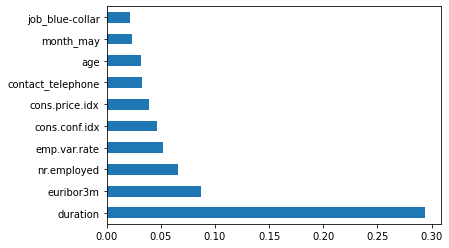

In [57]:
# Chekcing which featuer / variable is important

(pd.Series(model_rf_smote.feature_importances_, index=predictor.columns).nlargest(10).plot(kind='barh'))

plt.show()

# Bagging Classifier

In [58]:
from sklearn.ensemble import BaggingClassifier

#Creating the instance / object

bagging = BaggingClassifier(model_rf_smote, random_state=1) # Here we provide the model we created using RF.

# Fitting the model

bagging.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=False,
                                                        random_state=0),
                  random_state=1)

In [59]:
bagging.predict(x_test)

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [60]:
bagging.n_estimators

10

In [61]:
bagg_pred = bagging.predict(x_test)

In [62]:
print(classification_report(y_test, bagg_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10857
           1       0.95      0.95      0.95     11072

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929



# AdaBoost Classifier based on Boosing technique

In [63]:
# Creating the instance / object for using in fitting

clf_abc1 = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

In [65]:
# Train the model

clf_abc1 = clf_abc1.fit(x_train, y_train)

# Predict the model

y_pred_abc1 = clf_abc1.predict(x_test)

In [66]:
y_pred_abc1

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [67]:
print(classification_report(y_test, y_pred_abc1))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10857
           1       0.93      0.93      0.93     11072

    accuracy                           0.93     21929
   macro avg       0.93      0.93      0.93     21929
weighted avg       0.93      0.93      0.93     21929



# Final ROC curve

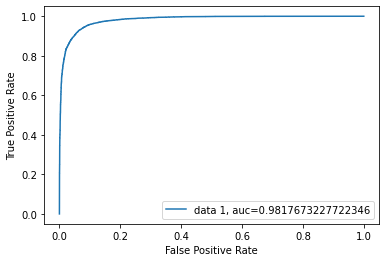

In [68]:
y_pred_proba = clf_abc1.predict_proba(x_test)[::,1]
fpr, tpr,_  = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

In [ ]:
#From the above information, we conclude that AdaBoost and Random Forest classifier gives maximum accuracy